# Simple NN model !
Create a NN model that convert Celsius to Fahrenheit.

Formula: $F = 1.8 C + 32$

In [51]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import tensorflow as tf

In [2]:
seed = 0
np.random.seed(seed)
n_observations = 1000

C_values = np.random.rand(n_observations)
F_values = 1.8 * C_values + 32  + np.random.normal(0, 0.05, size=n_observations)

In [4]:
layer_0 = tf.keras.layers.Dense(units=1, input_shape=[1]) 
# units=1 means number of neurons is 1 in this layer.

model = tf.keras.Sequential([layer_0])

In [5]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1)) # 0.1 is learning rate

In [6]:
learning = model.fit(C_values, F_values, epochs=500, verbose=0)

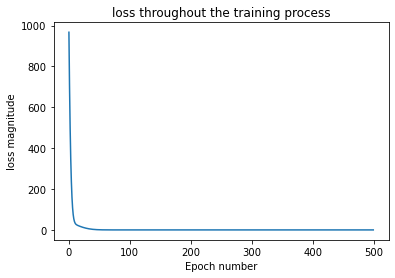

In [7]:
plt.plot(learning.history['loss'])
plt.title('loss throughout the training process')
plt.xlabel('Epoch number')
plt.ylabel('loss magnitude')
plt.show()

In [8]:
layer_0.get_weights()

[array([[1.7709541]], dtype=float32), array([32.01486], dtype=float32)]

In [9]:
x_test = np.array([[100]])
model.predict(x_test)

array([[209.11028]], dtype=float32)

which is close to the actual value (i.e. `100 * 1.8 + 32 = 212`)

**Experiment:** What if we consider one or more hidden layers? How does that affect the output and what would be the weights?

# NN for MNIST (with 9 classes)

In [13]:
#hand writing
data = tf.keras.datasets.mnist.load_data(path='mnist.npz') 

In [26]:
data_train = data[0]
data_test = data[1]

In [27]:
X_train = data_train[0] / 255
y_train = data_train[1] 

In [28]:
X_test = data_test[0] / 255
y_test = data_test[1]

In [29]:
print('shape of training data: ', X_train.shape)

shape of training data:  (60000, 28, 28)


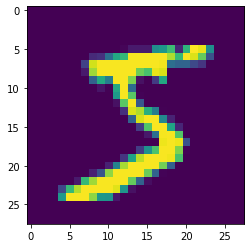

In [35]:
plt.imshow(X_train[0])
plt.show()

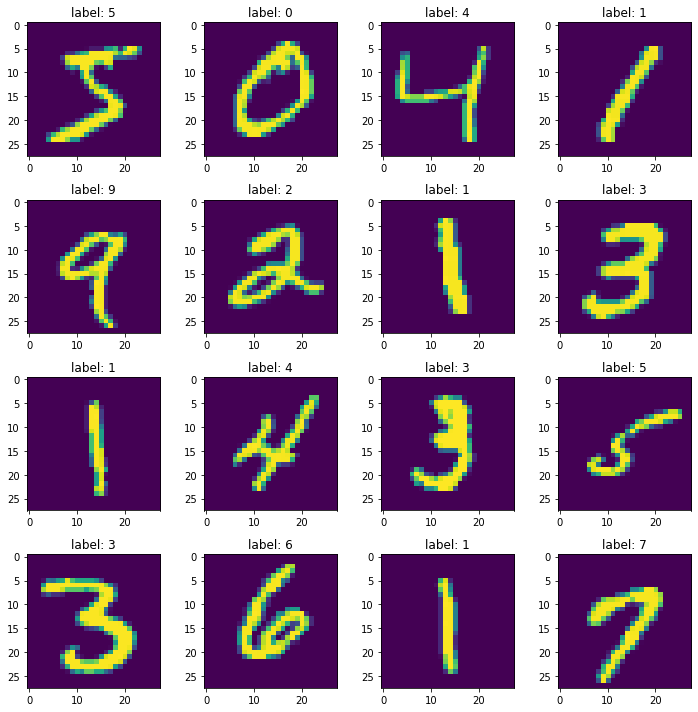

In [40]:
# let us plot first 16 images
plt.figure(figsize=(10, 10))
for i in range(16):
    img_idx = i + 1
    plt.subplot(4,4, img_idx)
    plt.title(f"label: {y_train[i]}")
    plt.imshow(X_train[i])
    i += 1
    
plt.tight_layout()
plt.show()

In [41]:
# image classification has different steps such as
# flattening, filtering, pooling.

layer_input = tf.keras.layers.Flatten(input_shape=(28, 28, 1)) 
# because we want to feed one value to each node in input layer, 
# so, we flattern it!

layer_hidden = tf.keras.layers.Dense(128, activation=tf.nn.relu)
layer_output = tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
# softmax is good when we have multi-classes
# it returns a value for each class which shows 
# the probablity of input being member of that class.

model = tf.keras.Sequential([
    layer_input,
    layer_hidden,
    layer_output,
])

In [43]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [45]:
BATCH_SIZE = 32
learning = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0361 - accuracy: 0.9891
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0292 - accuracy: 0.9914
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0238 - accuracy: 0.9927
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0190 - accuracy: 0.9946
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0164 - accuracy: 0.9948


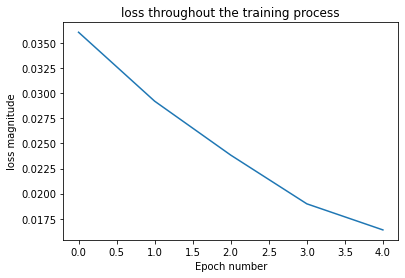

In [46]:
plt.plot(learning.history['loss'])
plt.title('loss throughout the training process')
plt.xlabel('Epoch number')
plt.ylabel('loss magnitude')
plt.show()

In [49]:
y_test_proba = model.predict(X_test, batch_size=BATCH_SIZE)
y_test_proba

array([[5.23378866e-12, 1.05750035e-11, 6.79106771e-09, ...,
        9.99997735e-01, 8.71741435e-08, 9.57261719e-08],
       [2.79216949e-12, 2.15111573e-09, 1.00000000e+00, ...,
        1.16842620e-17, 1.85968450e-08, 8.43743151e-17],
       [1.51428214e-09, 9.99411225e-01, 9.36091019e-05, ...,
        3.72683979e-04, 9.66622101e-05, 5.75933612e-08],
       ...,
       [2.90487355e-16, 6.84949669e-14, 2.44892421e-14, ...,
        3.60179477e-08, 2.24661804e-07, 3.14508299e-07],
       [2.89053798e-11, 3.17893477e-16, 3.45884739e-15, ...,
        1.51201805e-12, 7.83015935e-07, 1.41605626e-13],
       [8.00922273e-10, 2.22550297e-17, 8.81208561e-12, ...,
        1.06792564e-18, 1.24000989e-13, 7.69894821e-16]], dtype=float32)

In [50]:
y_test_pred = np.argmax(y_test_proba, axis=1)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [52]:
accuracy_score(y_test, y_test_pred)

0.9796